In [1]:
%cd /Users/gwg/dmcm
%matplotlib inline

/Users/gwg/dmcm


In [18]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'arial'
# plt.style.use('seaborn-dark-palette')

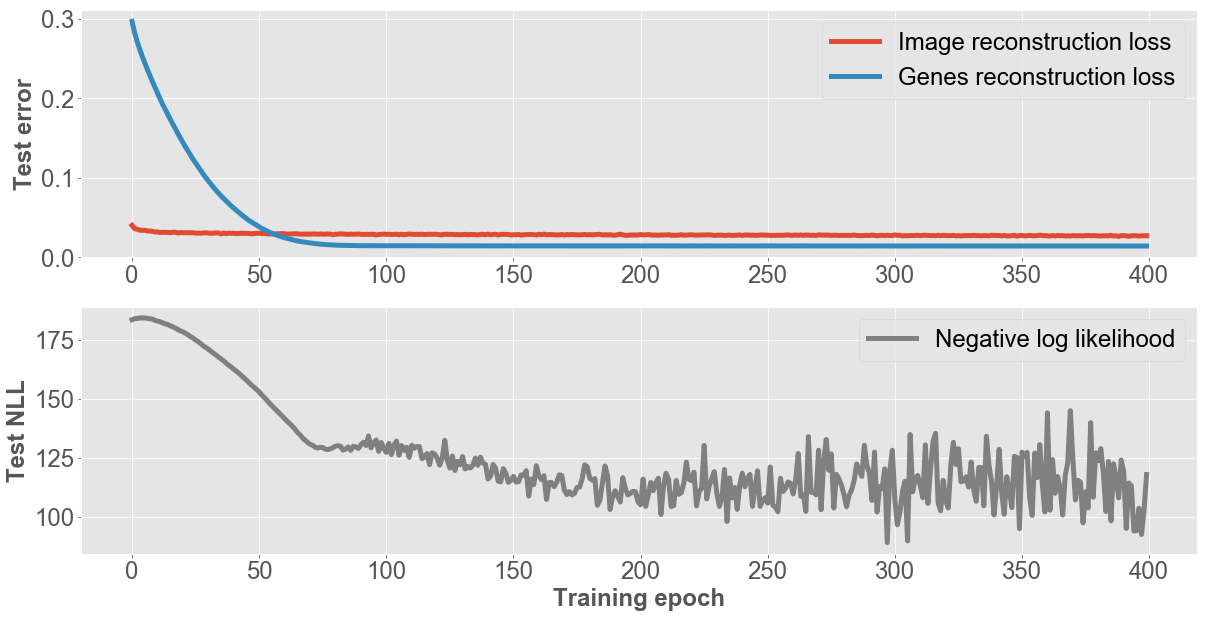

In [20]:
fname = 'experiments/20190125_small_lat_dim/'\
        'gtexv8_mode-dpcca_batch_size-128_seed-0_latent_dim-10_lr-0.0001_l1_coef-0.0_private_z-1_clip-1.0/out.txt'

with open(fname) as out:
    lines = [l.strip() for l in out]

idx = None
for i, l in enumerate(lines):
    if l == 'Training model.':
        idx = i+2
        
losses = lines[idx:]
img_curve = []
gen_curve = []
nll_curve = []
for l in losses:
    try:
        parts = l.split('\t')
        img_curve.append(float(parts[7]))
        gen_curve.append(float(parts[8]))
        nll_curve.append(float(parts[5]))
    except:
        pass

fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(20, 10)

n = 400
img_curve = img_curve[:n]
gen_curve = gen_curve[:n]
nll_curve = nll_curve[:n]

x = list(range(len(img_curve)))

FS = 24
LW = 5

y = img_curve
ax1.plot(x, y,label='Image reconstruction loss', linewidth=LW)
y = gen_curve
ax1.plot(x, y, label='Genes reconstruction loss', linewidth=LW)
ax1.set_ylabel('Test error', fontsize=FS, fontweight='bold')
ax1.legend(fontsize=FS)
ax1.tick_params(axis='both', which='major', labelsize=FS)

y = nll_curve
ax2.plot(x, y, color='gray', label='Negative log likelihood', linewidth=LW)
ax2.set_xlabel('Training epoch', fontsize=FS, fontweight='bold')
ax2.set_ylabel('Test NLL', fontsize=FS, fontweight='bold')
ax2.legend(fontsize=FS)
ax2.tick_params(axis='both', which='major', labelsize=FS)